# 1. Import dependents

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from perceptron import Perceptron

# 2. Load data and preprocessing data

In [13]:
df = pd.read_csv('abalone.csv')
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [14]:
df.loc[df['Sex'] == 'M', 'Sex'] = 0
df.loc[df['Sex'] == 'F', 'Sex'] = 1
df.loc[df['Sex'] == 'I', 'Sex'] = 2

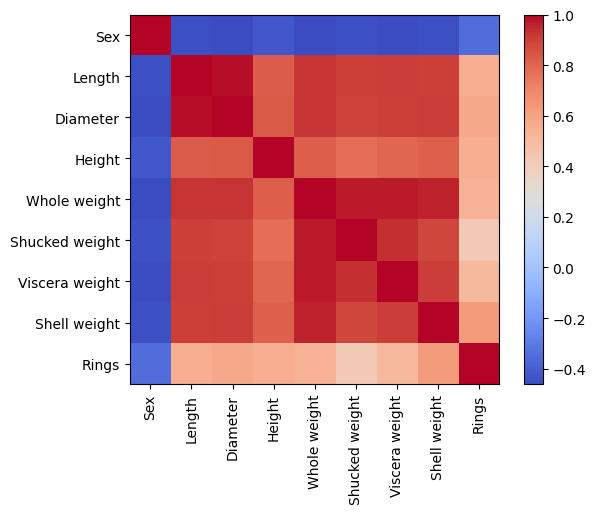

In [15]:
corr_matrix = df.corr()
plt.imshow(corr_matrix.to_numpy(), cmap='coolwarm', interpolation='nearest') 
plt.colorbar()

plt.xticks(ticks=range(len(corr_matrix.columns)), labels=corr_matrix.columns, rotation=90)
plt.yticks(ticks=range(len(corr_matrix.columns)), labels=corr_matrix.columns)

plt.show()

In [16]:
X = df['Diameter'].values
Y = df['Length'].values

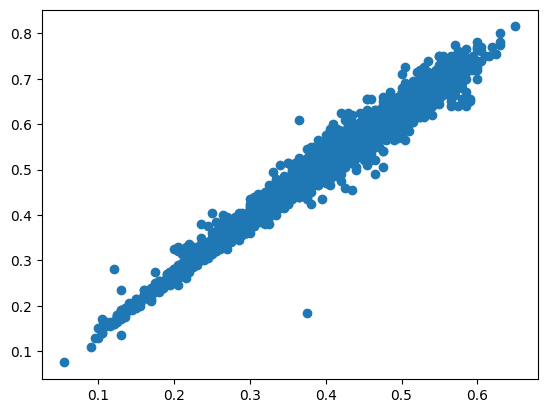

In [17]:
plt.scatter(X, Y)
plt.show()

# 3. Train, Test split

In [18]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=42)

# 4. Initial model

In [19]:
model = Perceptron(
    weight_learning_rate=.001,
    bias_learning_rate=.001,
    epochs=80
)

# 5. Train model

In [20]:
model.train(x_train, y_train)

Epoch: 1, Loss: 0.08001059606435262
Epoch: 2, Loss: 0.07758435780683531
Epoch: 3, Loss: 0.07553994849098745
Epoch: 4, Loss: 0.07354032053812652
Epoch: 5, Loss: 0.07159727085046144
Epoch: 6, Loss: 0.06970975380076795
Epoch: 7, Loss: 0.06787661490772368
Epoch: 8, Loss: 0.06609631898199818
Epoch: 9, Loss: 0.06436715852593586
Epoch: 10, Loss: 0.06268886054745174
Epoch: 11, Loss: 0.061058474487576835
Epoch: 12, Loss: 0.059474310799536
Epoch: 13, Loss: 0.057935573091472396
Epoch: 14, Loss: 0.056442551400246836
Epoch: 15, Loss: 0.05499197121790571
Epoch: 16, Loss: 0.05358357234393921
Epoch: 17, Loss: 0.052217106056747245
Epoch: 18, Loss: 0.05089032376906684
Epoch: 19, Loss: 0.04960270116649726
Epoch: 20, Loss: 0.04835306995958794
Epoch: 21, Loss: 0.04714138260231115
Epoch: 22, Loss: 0.04596584572404391
Epoch: 23, Loss: 0.04482582228771264
Epoch: 24, Loss: 0.043719867325632454
Epoch: 25, Loss: 0.04264883818636162
Epoch: 26, Loss: 0.041609603550566567
Epoch: 27, Loss: 0.04060161317392599
Epoch:

# 6. Evaluate model

In [21]:
x_test = x_test.reshape(-1, 1)
model.evaluate(x_test, y_test)

0.13011367443220143

In [22]:
y_pred = model.predict(x_test)
y_pred.shape

(836, 1)

In [23]:
y_pred = y_pred.reshape(-1)
y_pred.shape

(836,)

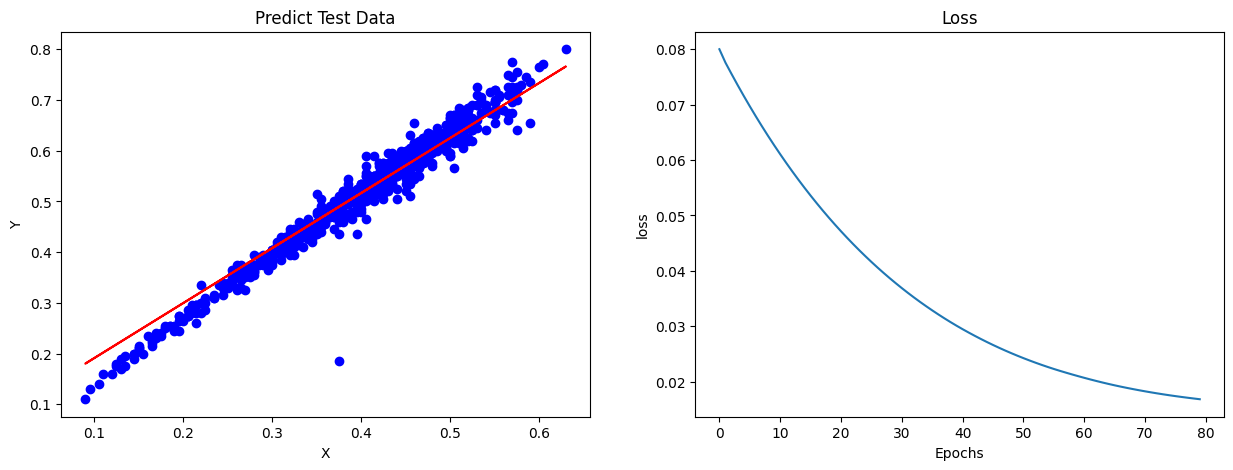

In [25]:
fig, (ax_1, ax_2) = plt.subplots(1, 2, figsize=(15, 5))
ax_1.scatter(x_test, y_test, color='blue')
ax_1.plot(x_test, y_pred, color='red')
ax_1.set_title("Predict Test Data")
ax_1.set_xlabel("X")
ax_1.set_ylabel("Y")

ax_2.plot(model.losses)
ax_2.set_title("Loss")
ax_2.set_xlabel("Epochs")
ax_2.set_ylabel("loss")
plt.show()